In [2]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [3]:
cardio = pd.read_csv('cardio_train.csv',delimiter=';')
cardio = cardio.drop(columns=['id'])
cardio.head()

FileNotFoundError: [Errno 2] No such file or directory: 'cardio_train.csv'

In [1]:
duplicate_sum = cardio.duplicated().sum()
if duplicate_sum:
    print('Duplicates Rows in Dataset are : {}'.format(duplicate_sum))
else:
    print('Dataset contains no Duplicate Values')
    
cardio.drop_duplicates(keep = 'first', inplace = True)
print('Total {} datapoints remaining with {} features'.format(cardio.shape[0], cardio.shape[1]))

NameError: name 'cardio' is not defined

In [8]:
cardio.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000
mean,19468.950126,1.349648,164.359152,74.208519,128.820453,96.636261,1.366997,1.226535,0.088159,0.053790,0.803718,0.499771
std,2467.374620,0.476862,8.211218,14.397211,154.037729,188.504581,0.680333,0.572353,0.283528,0.225604,0.397187,0.500004
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
#cleaning up the dataset by redfining datatset in terms of converting cardio intro a string, calculating age, getting height into proper units and calucalting bmi
cardio[['cardio']] = cardio[['cardio']].astype(str)
cardio['year']= (cardio['age']/365).round(0)
cardio['height(m)']= (cardio['height']/100).round(3)
cardio['BMI']= (cardio['weight']/((cardio['height(m)'])*cardio['height(m)']))
cardio = cardio.drop(columns=['height','age'])

In [11]:
cardio.describe()

,gender,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,year,height(m),BMI
count,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000
mean,1.349648,74.208519,128.820453,96.636261,1.366997,1.226535,0.088159,0.053790,0.803718,53.338945,1.643592,27.557610
std,0.476862,14.397211,154.037729,188.504581,0.680333,0.572353,0.283528,0.225604,0.397187,6.765633,0.082112,6.092210
min,1.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,30.000000,0.550000,3.471784
25%,1.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,48.000000,1.590000,23.875115
50%,1.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,54.000000,1.650000,26.391837
75%,2.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,58.000000,1.700000,30.222222
max,2.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,65.000000,2.500000,298.666667


In [12]:
outlier = ((cardio["ap_hi"]>200) | (cardio["ap_lo"]>140) | (cardio["ap_lo"]<50) | (cardio["ap_hi"]<80) | (cardio["height(m)"]<1.4 ) | (cardio["height(m)"]>2.2 ) )
print("There is {} outlier".format(cardio[outlier]["cardio"].count()))

There is 1485 outlier


In [13]:
cardio = cardio[~outlier]
cardio.describe()

,gender,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,year,height(m),BMI
count,68491.000000,68491.000000,68491.000000,68491.000000,68491.000000,68491.000000,68491.000000,68491.000000,68491.000000,68491.000000,68491.00000,68491.000000
mean,1.348834,74.113345,126.565928,81.333693,1.364763,1.225869,0.088085,0.053554,0.803522,53.326641,1.64464,27.432304
std,0.476605,14.278748,16.534878,9.447687,0.679058,0.571859,0.283420,0.225138,0.397337,6.766856,0.07803,5.189532
min,1.000000,11.000000,80.000000,50.000000,1.000000,1.000000,0.000000,0.000000,0.000000,30.000000,1.40000,3.471784
25%,1.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,48.000000,1.59000,23.875115
50%,1.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,54.000000,1.65000,26.346494
75%,2.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,58.000000,1.70000,30.116213
max,2.000000,200.000000,200.000000,140.000000,3.000000,3.000000,1.000000,1.000000,1.000000,65.000000,2.07000,68.308315


In [15]:
womendata = cardio[cardio['gender'] == 1]
maledata = cardio[cardio['gender'] == 2]



In [16]:
womendata = womendata.drop(columns=['gender'])
womendata.head()


,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,year,height(m),BMI
1,85.0,140,90,3,1,0,0,1,1,55.0,1.56,34.927679
2,64.0,130,70,3,1,0,0,0,1,52.0,1.65,23.507805
4,56.0,100,60,1,1,0,0,0,0,48.0,1.56,23.011177
5,67.0,120,80,2,2,0,0,0,0,60.0,1.51,29.384676
6,93.0,130,80,3,1,0,0,1,0,61.0,1.57,37.729725


In [17]:
maledata = maledata.drop(columns=['gender'])
maledata.head()

,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,year,height(m),BMI
0,62.0,110,80,1,1,0,0,1,0,50.0,1.68,21.967120
3,82.0,150,100,1,1,0,0,1,1,48.0,1.69,28.710479
7,95.0,130,90,3,3,0,0,1,1,62.0,1.78,29.983588
11,60.0,120,80,1,1,0,0,1,0,52.0,1.73,20.047446
12,60.0,120,80,1,1,0,0,0,0,41.0,1.65,22.038567


In [18]:
maledata.corr()


,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,year,height(m),BMI
weight,1.000000,0.251063,0.239435,0.147389,0.119708,0.013812,0.041667,-0.024303,0.019160,0.438960,0.899287
ap_hi,0.251063,1.000000,0.684918,0.188902,0.081989,0.013012,0.032495,-0.003250,0.173593,0.032547,0.263724
ap_lo,0.239435,0.684918,1.000000,0.160581,0.066415,0.001890,0.040880,-0.000432,0.117014,0.050522,0.241936
cholesterol,0.147389,0.188902,0.160581,1.000000,0.418367,0.031550,0.045137,0.019357,0.137123,0.030117,0.147197
gluc,0.119708,0.081989,0.066415,0.418367,1.000000,-0.003683,0.013484,0.003779,0.091542,0.018834,0.122887
smoke,0.013812,0.013012,0.001890,0.031550,-0.003683,1.000000,0.360088,0.047198,-0.061773,0.039226,-0.003044
alco,0.041667,0.032495,0.040880,0.045137,0.013484,0.360088,1.000000,0.038029,-0.034596,0.031665,0.031515
active,-0.024303,-0.003250,-0.000432,0.019357,0.003779,0.047198,0.038029,1.000000,-0.008275,0.004554,-0.029848
year,0.019160,0.173593,0.117014,0.137123,0.091542,-0.061773,-0.034596,-0.008275,1.000000,-0.092870,0.067833
height(m),0.438960,0.032547,0.050522,0.030117,0.018834,0.039226,0.031665,0.004554,-0.092870,1.000000,0.009482


In [19]:
womendata.corr()

,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,year,height(m),BMI
weight,1.000000,0.269522,0.246814,0.148728,0.107692,0.023141,0.047785,-0.015870,0.081221,0.181566,0.911522
ap_hi,0.269522,1.000000,0.722469,0.200611,0.100784,0.000677,0.017633,-0.001785,0.232323,-0.045283,0.286264
ap_lo,0.246814,0.722469,1.000000,0.164689,0.082540,0.004351,0.020389,-0.000423,0.178815,-0.028351,0.257181
cholesterol,0.148728,0.200611,0.164689,1.000000,0.466023,0.023260,0.045591,0.004250,0.163954,-0.081384,0.179981
gluc,0.107692,0.100784,0.082540,0.466023,1.000000,0.010958,0.016861,-0.013252,0.102570,-0.027342,0.117604
smoke,0.023141,0.000677,0.004351,0.023260,0.010958,1.000000,0.146948,-0.002421,-0.025866,0.008664,0.017496
alco,0.047785,0.017633,0.020389,0.045591,0.016861,0.146948,1.000000,0.012581,-0.017368,-0.009729,0.050184
active,-0.015870,-0.001785,-0.000423,0.004250,-0.013252,-0.002421,0.012581,1.000000,-0.011447,-0.026296,-0.005929
year,0.081221,0.232323,0.178815,0.163954,0.102570,-0.025866,-0.017368,-0.011447,1.000000,-0.085138,0.117059
height(m),0.181566,-0.045283,-0.028351,-0.081384,-0.027342,0.008664,-0.009729,-0.026296,-0.085138,1.000000,-0.231250


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6343545956805625

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6263184329482672



<AxesSubplot:>

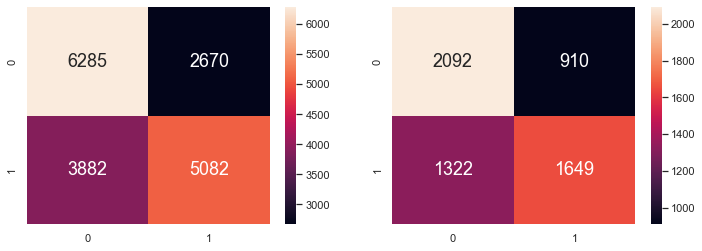

In [24]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Extract Response and Predictors
y = pd.DataFrame(maledata['cardio'])
X = pd.DataFrame(maledata[['year', 'cholesterol', 'gluc', 'alco', 'BMI']])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])



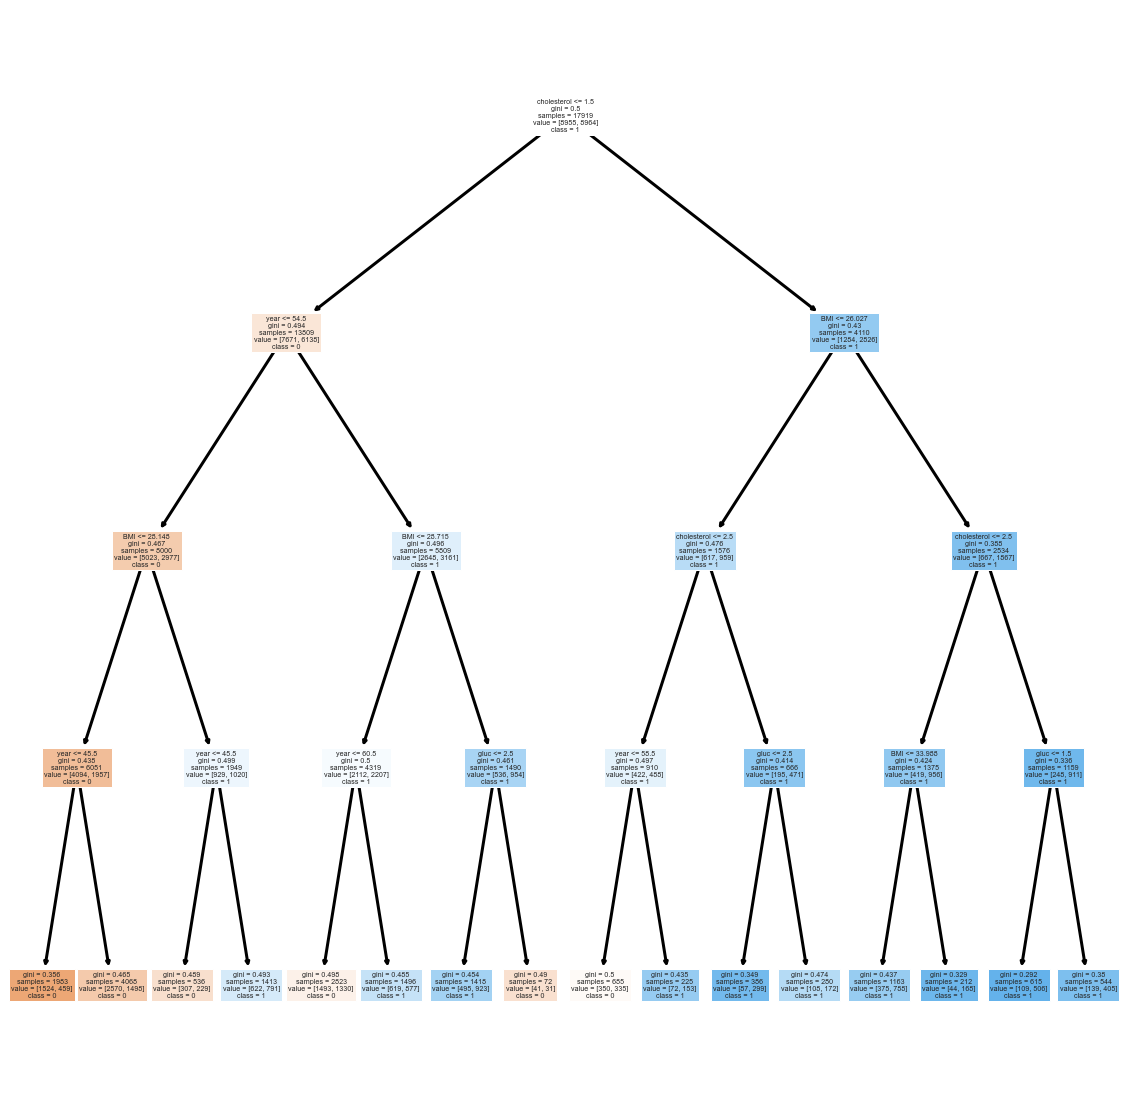

In [25]:
# Plot the Decision Tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(20, 20))
out = plot_tree(dectree, 
          feature_names = X_train.columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6372985739483991

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6353363228699551



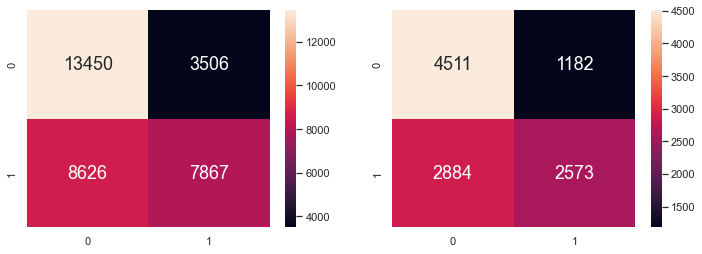

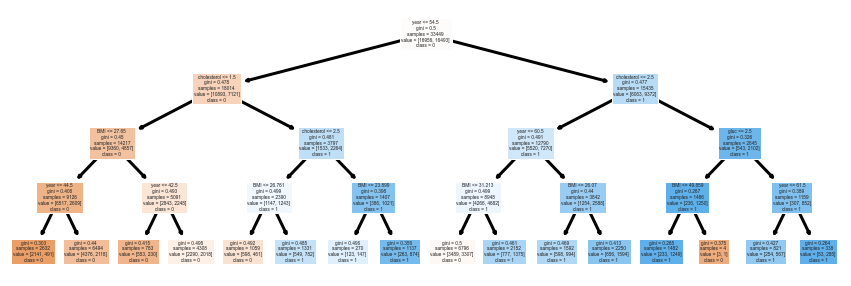

In [21]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Extract Response and Predictors
y = pd.DataFrame(womendata['cardio'])
X = pd.DataFrame(womendata[['year', 'cholesterol', 'gluc', 'alco', 'BMI']])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Plot the Decision Tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(15,5 ))
out = plot_tree(dectree, 
          feature_names = X_train.columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

In [26]:
cardio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68491 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   gender       68491 non-null  int64  
 1   weight       68491 non-null  float64
 2   ap_hi        68491 non-null  int64  
 3   ap_lo        68491 non-null  int64  
 4   cholesterol  68491 non-null  int64  
 5   gluc         68491 non-null  int64  
 6   smoke        68491 non-null  int64  
 7   alco         68491 non-null  int64  
 8   active       68491 non-null  int64  
 9   cardio       68491 non-null  object 
 10  year         68491 non-null  float64
 11  height(m)    68491 non-null  float64
 12  BMI          68491 non-null  float64
dtypes: float64(4), int64(8), object(1)
memory usage: 7.3+ MB


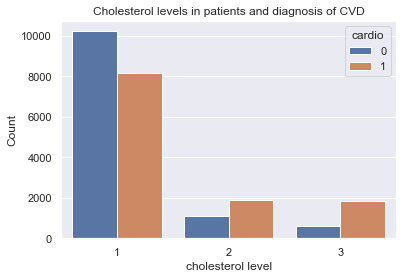

In [27]:
#using a clustered bar chart
sb.countplot(data = maledata,x='cholesterol',hue='cardio')
plt.title('Cholesterol levels in patients and diagnosis of CVD')
plt.xlabel('cholesterol level')
plt.ylabel('Count');

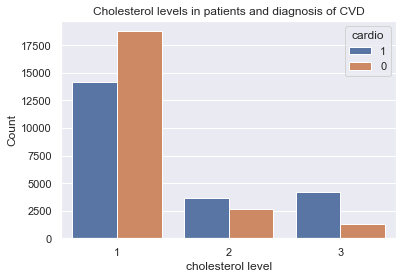

In [28]:
#using a clustered bar chart
sb.countplot(data = womendata,x='cholesterol',hue='cardio')
plt.title('Cholesterol levels in patients and diagnosis of CVD')
plt.xlabel('cholesterol level')
plt.ylabel('Count');

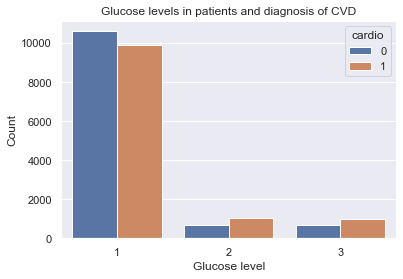

In [29]:
#using a clustered bar chart
sb.countplot(data = maledata,x='gluc',hue='cardio')
plt.title('Glucose levels in patients and diagnosis of CVD')
plt.xlabel('Glucose level')
plt.ylabel('Count');

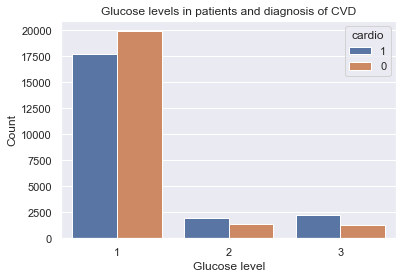

In [30]:
#using a clustered bar chart
sb.countplot(data = womendata,x='gluc',hue='cardio')
plt.title('Glucose levels in patients and diagnosis of CVD')
plt.xlabel('Glucose level')
plt.ylabel('Count');

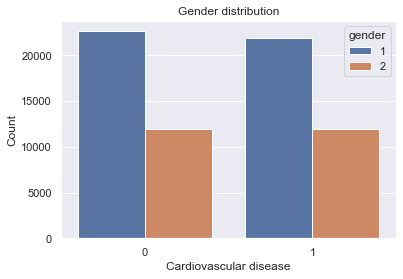

In [32]:
#using seaborns countplot 
sb.countplot(data = cardio,x='cardio',hue='gender')
#setting axis labels
plt.title('Gender distribution')
plt.xlabel('Cardiovascular disease')
plt.ylabel('Count');

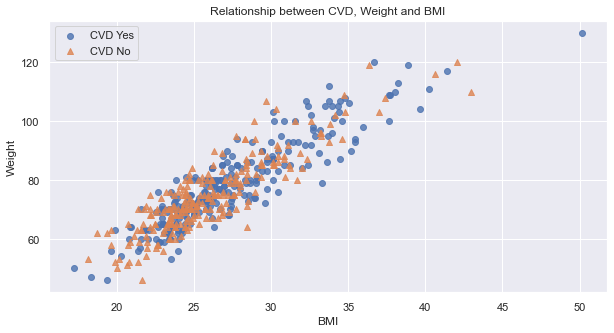

In [22]:
#creating a seed for reproducibility for my random sample from the cardio dataset
np.random.seed(2000)

#creating a sample dataset to reduce overplotting
sample = np.random.choice(maledata.shape[0],500,replace = False)
cardio_subset = maledata.iloc[sample]

#setting my figure size
plt.figure(figsize=[10,5])
#Creating markers for the categories
cvd_markers =[['1','o'],['0','^']]
#looping through the markers to create a plot
for cvd, marker in cvd_markers:
    plot_data= cardio_subset.loc[cardio_subset['cardio']== cvd]
    sb.regplot(data=plot_data,x='BMI',y='weight',x_jitter = 0.05,fit_reg=False,marker=marker);
#setting title and axis labels
plt.title('Relationship between CVD, Weight and BMI')
plt.xlabel('BMI')
plt.ylabel('Weight')
plt.legend(['CVD Yes','CVD No']);


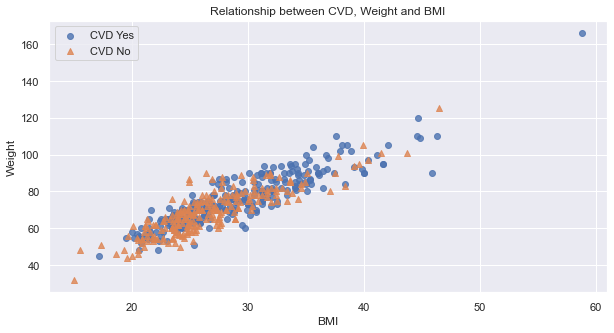

In [33]:
#creating a seed for reproducibility for my random sample from the cardio dataset
np.random.seed(2000)

#creating a sample dataset to reduce overplotting
sample = np.random.choice(womendata.shape[0],500,replace = False)
cardio_subset = womendata.iloc[sample]

#setting my figure size
plt.figure(figsize=[10,5])
#Creating markers for the categories
cvd_markers =[['1','o'],['0','^']]
#looping through the markers to create a plot
for cvd, marker in cvd_markers:
    plot_data= cardio_subset.loc[cardio_subset['cardio']== cvd]
    sb.regplot(data=plot_data,x='BMI',y='weight',x_jitter = 0.05,fit_reg=False,marker=marker);
#setting title and axis labels
plt.title('Relationship between CVD, Weight and BMI')
plt.xlabel('BMI')
plt.ylabel('Weight')
plt.legend(['CVD Yes','CVD No']);


## Random Forest Algorithm 


In [34]:
cardio.corr()

,gender,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,year,height(m),BMI
gender,1.000000,0.157114,0.060429,0.067314,-0.036493,-0.021078,0.338805,0.171786,0.005648,-0.023542,0.524067,-0.111089
weight,0.157114,1.000000,0.268899,0.251255,0.140545,0.106969,0.067124,0.068068,-0.017675,0.054517,0.311258,0.868257
ap_hi,0.060429,0.268899,1.000000,0.710882,0.194007,0.093069,0.027208,0.033715,-0.001941,0.209599,0.016146,0.269346
ap_lo,0.067314,0.251255,0.710882,1.000000,0.160367,0.075573,0.025082,0.040081,-0.000045,0.154923,0.034442,0.241882
cholesterol,-0.036493,0.140545,0.194007,0.160367,1.000000,0.451005,0.010271,0.035532,0.009070,0.155246,-0.056274,0.172992
gluc,-0.021078,0.106969,0.093069,0.075573,0.451005,1.000000,-0.005555,0.010378,-0.007677,0.099103,-0.020994,0.120286
smoke,0.338805,0.067124,0.027208,0.025082,0.010271,-0.005555,1.000000,0.340462,0.025069,-0.048005,0.196944,-0.033267
alco,0.171786,0.068068,0.033715,0.040081,0.035532,0.010378,0.340462,1.000000,0.024757,-0.028772,0.099277,0.017863
active,0.005648,-0.017675,-0.001941,-0.000045,0.009070,-0.007677,0.025069,0.024757,1.000000,-0.010445,-0.010247,-0.013455
year,-0.023542,0.054517,0.209599,0.154923,0.155246,0.099103,-0.048005,-0.028772,-0.010445,1.000000,-0.087198,0.103151
